In [ ]:
! pip install seaborn
! pip install statsmodels
! pip install scikit-learn
! pip install matplotlib

In [1]:
import pandas as pd
data = pd.read_csv("mat_csv\\WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [2]:
data.shape

(109, 2)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [4]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\drxmu\AppData\Local\Temp\ipykernel_5752\2172519139.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AT'])
C:\Users\drxmu\AppData\Local\Temp\ipykernel_5752\2172519139.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Waist'])


<Axes: xlabel='Waist', ylabel='Density'>

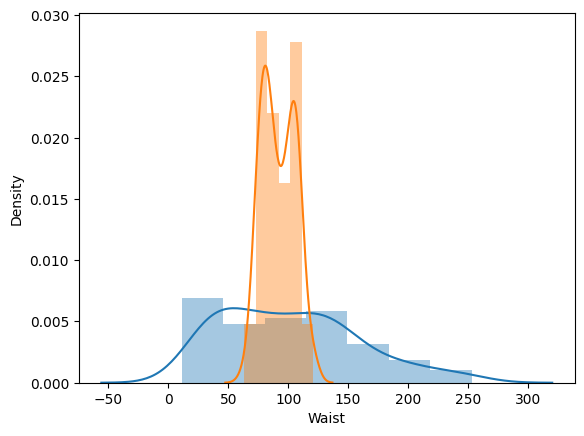

In [7]:
import seaborn as sns
sns.distplot(data['AT'])
sns.distplot(data['Waist'])

In [34]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

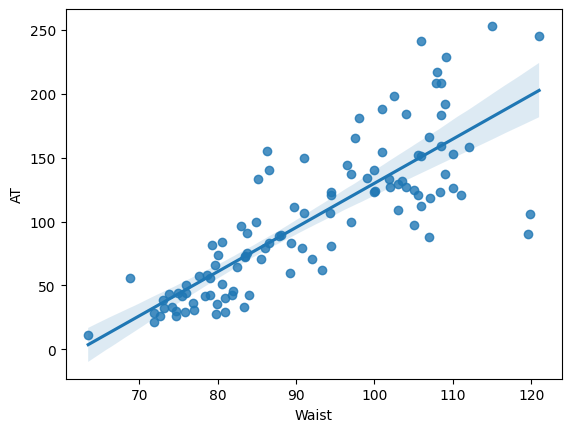

In [35]:
sns.regplot(x="Waist", y="AT", data=data);

In [36]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [38]:
#R squared values
(model.rsquared,model.rsquared_adj)

(np.float64(0.670036893052843), np.float64(0.6669531256981966))

In [39]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([26,45,60])

In [40]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])
data_pred

,Waist
0,26
1,45
2,60


In [41]:
model.predict(data_pred)

0   -126.051144
1    -60.332815
2     -8.449924
dtype: float64